# Projeto de análise de dados de acidentes na cidade de Porto Alegre - RS

In [6]:
# Importando base de dados

import pandas as pd

base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto_acidentes/cat_acidentes.csv', sep=';').dropna(subset=['longitude', 'latitude'])

# Tratando colunas de datas

base['data'] = pd.to_datetime(base['data'])

base['dia'] = base['data'].dt.day
base['mes'] = base['data'].dt.month
base['ano'] = base['data'].dt.year

base = base.drop(['data_extracao', 'data', 'idacidente'], axis=1)[base['ano'] <= 2024]


display(base.info())

display(base['ano'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 62742 entries, 0 to 72948
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   predial1    60404 non-null  float64
 1   queda_arr   62742 non-null  float64
 2   feridos     62742 non-null  int64  
 3   feridos_gr  62742 non-null  int64  
 4   mortes      62742 non-null  int64  
 5   morte_post  62742 non-null  int64  
 6   fatais      62742 non-null  int64  
 7   auto        62742 non-null  int64  
 8   taxi        62742 non-null  int64  
 9   lotacao     62742 non-null  int64  
 10  onibus_urb  62742 non-null  int64  
 11  onibus_met  62742 non-null  int64  
 12  onibus_int  62742 non-null  int64  
 13  caminhao    62742 non-null  int64  
 14  moto        62742 non-null  int64  
 15  carroca     62742 non-null  int64  
 16  bicicleta   62742 non-null  int64  
 17  outro       62742 non-null  int64  
 18  cont_vit    62742 non-null  int64  
 19  ups         62742 non-null  in

None

,count
ano,
2023,14569
2022,13326
2019,12444
2021,11700
2024,7807
2020,2896


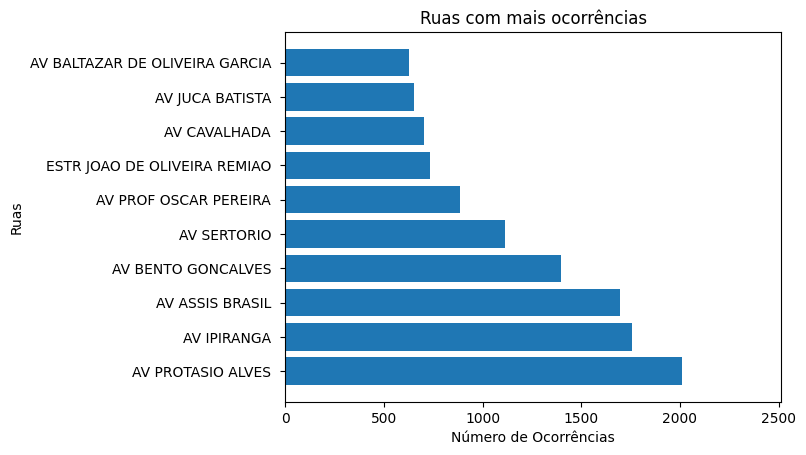

In [7]:
import matplotlib.pyplot as plt

# Criando nova base a partir de 'log1' e 'log2'
base_ruas = base[['log1', 'log2']]

# Removendo 'log1' e 'log2' da base original
base = base.drop(['log1', 'log2'], axis=1)

# Contando as ocorrências das ruas em 'log1'
contagem_ruas = base_ruas['log1'].value_counts().head(10)

# Criando o gráfico de barras horizontais
fig, ax = plt.subplots()

ax.barh(contagem_ruas.index, contagem_ruas.values)
ax.set_title('Ruas com mais ocorrências')
ax.set_xlabel('Número de Ocorrências')  # Rótulo do eixo x
ax.set_ylabel('Ruas')  # Rótulo do eixo y

# Ajustando o intervalo do eixo x
ax.set_xlim(0, contagem_ruas.values.max() + 500)  # Ajuste o valor conforme necessário

plt.show()


<ipython-input-12-bd7b08bb4c8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cruzamentos['cruzamento'] = cruzamentos['log1'] + ' & ' + cruzamentos['log2']


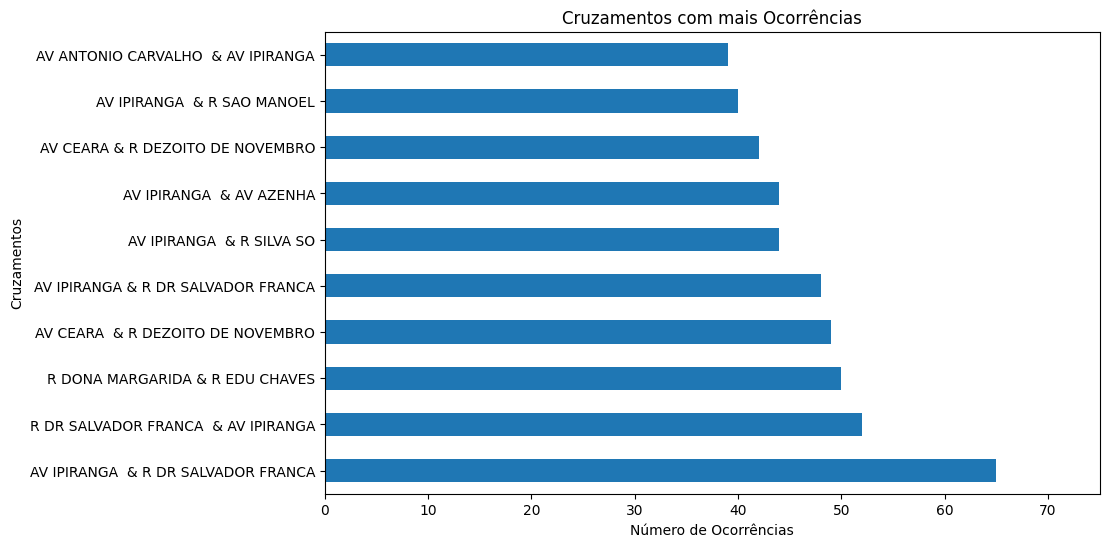

In [12]:
# Analisando acidentes em cruzamentos

cruzamentos = base_ruas[~base_ruas['log2'].isnull() & ~base_ruas['log1'].isnull()]

# Criando uma nova coluna que representa o cruzamento
cruzamentos['cruzamento'] = cruzamentos['log1'] + ' & ' + cruzamentos['log2']

# Contando as ocorrências de cada cruzamento
contagem_cruzamentos = cruzamentos['cruzamento'].value_counts().head(10)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_cruzamentos.plot(kind='barh')
plt.title('Cruzamentos com mais Ocorrências')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Cruzamentos')
plt.xlim(0, max(contagem_cruzamentos.values) + 10)
plt.show()

